In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("german_credit_data.csv")
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [3]:
df.shape

(1000, 11)

In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [7]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [8]:
df['Housing'].value_counts

<bound method IndexOpsMixin.value_counts of 0       own
1       own
2       own
3      free
4      free
       ... 
995     own
996     own
997     own
998    free
999     own
Name: Housing, Length: 1000, dtype: object>

In [9]:
df["Saving accounts"].value_counts

<bound method IndexOpsMixin.value_counts of 0           NaN
1        little
2        little
3        little
4        little
         ...   
995      little
996      little
997      little
998      little
999    moderate
Name: Saving accounts, Length: 1000, dtype: object>

In [10]:
df['Checking account'].value_counts

<bound method IndexOpsMixin.value_counts of 0        little
1      moderate
2           NaN
3        little
4        little
         ...   
995         NaN
996      little
997         NaN
998      little
999    moderate
Name: Checking account, Length: 1000, dtype: object>

In [44]:
df["Saving accounts"].fillna("Unknown",inplace=True)
df["Checking account"].fillna("Unknown",inplace=True)

In [45]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [13]:
cat_cols=df.dtypes[df.dtypes==object].index
num_cols=df.dtypes[df.dtypes!=object].index
cat_cols
num_cols

Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')

In [14]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')

In [15]:
num_cols

Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')

In [17]:
for i in cat_cols:
    print(f'Feature:{i} ! {df[i].nunique()}')
    print(f'Feature:{i} !{df[i].unique()}')
    print('*'*20)
    

Feature:Sex ! 2
Feature:Sex !['male' 'female']
********************
Feature:Housing ! 3
Feature:Housing !['own' 'free' 'rent']
********************
Feature:Saving accounts ! 4
Feature:Saving accounts ![nan 'little' 'quite rich' 'rich' 'moderate']
********************
Feature:Checking account ! 3
Feature:Checking account !['little' 'moderate' nan 'rich']
********************
Feature:Purpose ! 8
Feature:Purpose !['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
********************
Feature:Risk ! 2
Feature:Risk !['good' 'bad']
********************


In [18]:
for i in num_cols:
    print(f'Feature:{i} ! {df[i].nunique()}')
    print(f'Feature:{i} !{df[i].unique()}')
    print("*"*20)
    

Feature:Age ! 53
Feature:Age ![67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
********************
Feature:Job ! 4
Feature:Job ![2 1 3 0]
********************
Feature:Credit amount ! 921
Feature:Credit amount ![ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6078  7721  1410
  1449   392  6260

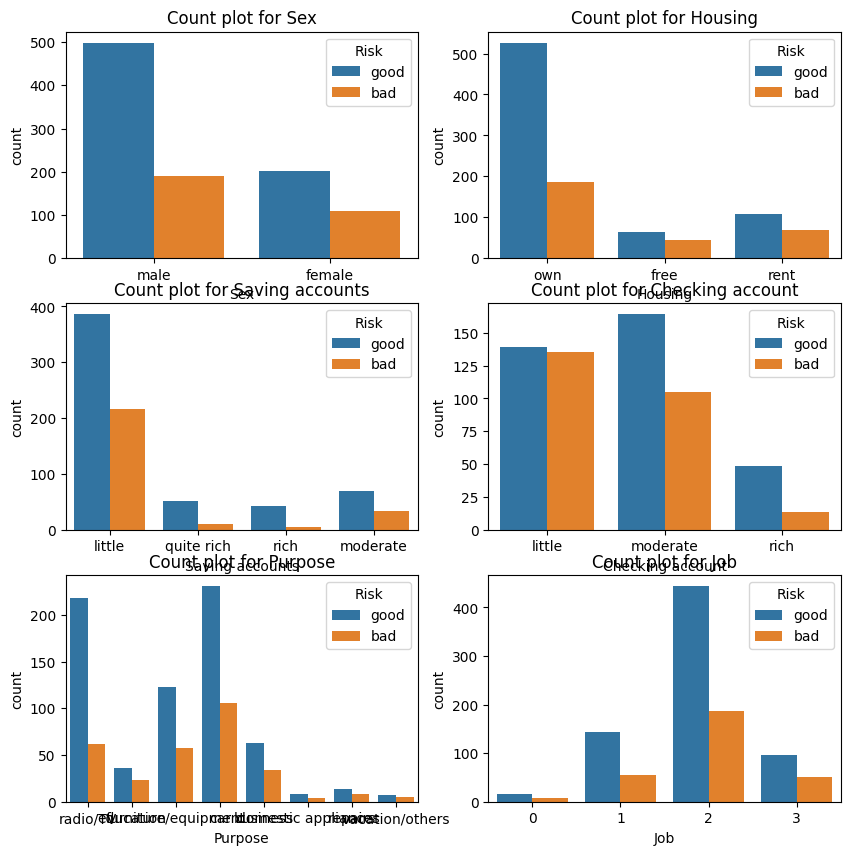

In [26]:
cols =["Sex","Housing","Saving accounts","Checking account","Purpose","Job"   ]
plt.figure(figsize=(10,10))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cols[i]],hue=df['Risk'])
    plt.title(f'Count plot for {cols[i]}')
plt.tight_layout
plt.show()

In [ ]:
corr= df.corr()
corr = sns.heatmap(corr,annot = True,cmap='RdBu')
corr


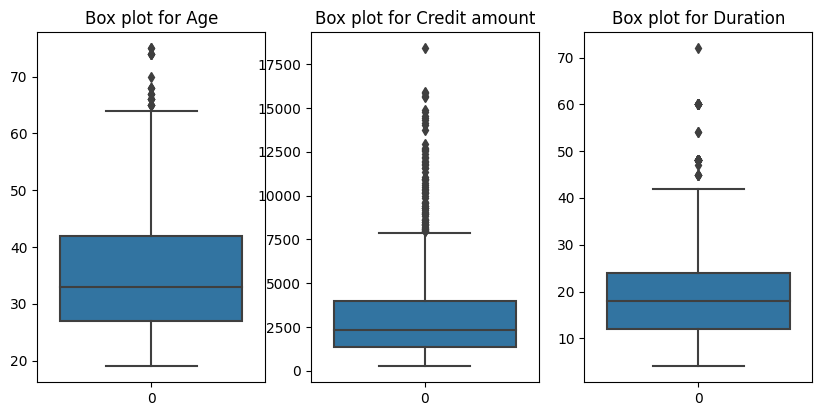

In [27]:
num_cols=['Age', 'Credit amount', 'Duration']

plt.figure(figsize=(10,10))
for i in range(len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[num_cols[i]])
    plt.title(f'Box plot for {num_cols[i]}')
plt.show()

In [35]:
x1=df[num_cols].describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T
x1=x1.iloc[:,3:]
x1

,min,50%,95%,96%,97%,98%,99%,max
Age,19.0,33.0,60.0,61.00,63.00,65.0,67.01,75.0
Credit amount,250.0,2319.5,9162.7,9966.68,10961.39,12169.7,14180.39,18424.0
Duration,4.0,18.0,48.0,48.00,48.00,48.0,60.00,72.0


In [39]:
df['Age']=np.where(df['Age']>65,65,df['Age'])
df['Credit amount']=np.where(df['Credit amount']>12169.7,12169.7,df['Credit amount'])
df['Duration']=np.where(df['Duration']>48,48,df['Duration'])

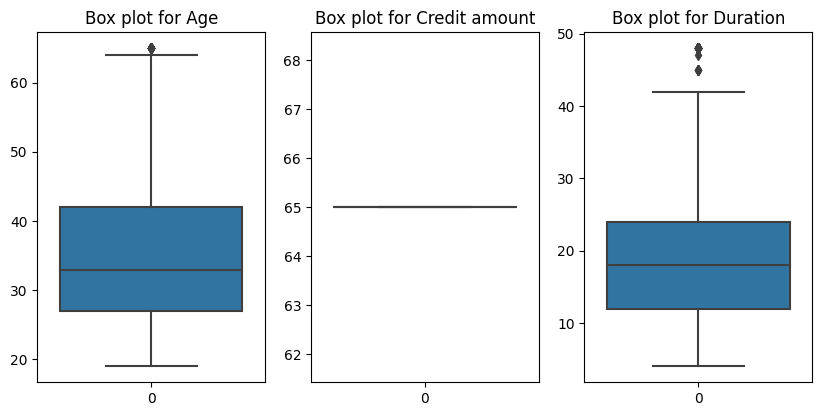

In [40]:
num_cols=['Age', 'Credit amount', 'Duration']

plt.figure(figsize=(10,10))
for i in range(len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[num_cols[i]])
    plt.title(f'Box plot for {num_cols[i]}')
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder

In [47]:
lb=LabelEncoder()
for i in cat_cols:
    df[i]=lb.fit_transform(df[i])

In [48]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,65,1,2,1,4,0,65.0,6,5,good
1,22,0,2,1,0,1,65.0,48,5,bad
2,49,1,1,1,0,3,65.0,12,3,good
3,45,1,2,0,0,0,65.0,42,4,good
4,53,1,2,0,0,0,65.0,24,1,bad


In [52]:
x=df.drop('Risk',axis=1)
y=df['Risk']
print(x.shape)
print(y.shape)


(1000, 9)
(1000,)


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 9)
(300, 9)
(700,)
(300,)


In [62]:
from sklearn.metrics import confusion_matrix,classification_report

In [86]:
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    train_acc=model.score(x_train,y_train)
    test_acc=model.score(x_test,y_test)
    cm=confusion_matrix(y_test,y_pred)
    print("Confusion_matrix:",cm)
    cr=classification_report(y_test,y_pred)
    print("Classifictiion_report:",cr)
    res_df=pd.DataFrame({'Train_acc':train_acc,'Test_acc':test_acc},index=[mname])
    return res_df

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [79]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,65,1,2,1,4,0,65.0,6,5,good
1,22,0,2,1,0,1,65.0,48,5,bad
2,49,1,1,1,0,3,65.0,12,3,good
3,45,1,2,0,0,0,65.0,42,4,good
4,53,1,2,0,0,0,65.0,24,1,bad


In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [98]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=10)
dt_res=eval_model(dt,x_train,x_test,y_train,y_test,'DT')
dt_res

Confusion_matrix: [[ 45  46]
 [ 49 160]]
Classifictiion_report:               precision    recall  f1-score   support

         bad       0.48      0.49      0.49        91
        good       0.78      0.77      0.77       209

    accuracy                           0.68       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.69      0.68      0.68       300



,Train_acc,Test_acc
DT,0.814286,0.683333


In [99]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=10,min_samples_leaf=10,random_state=0)
dt_res=eval_model(dt1,x_train,x_test,y_train,y_test,'DT1')
dt_res

Confusion_matrix: [[ 36  55]
 [ 42 167]]
Classifictiion_report:               precision    recall  f1-score   support

         bad       0.46      0.40      0.43        91
        good       0.75      0.80      0.77       209

    accuracy                           0.68       300
   macro avg       0.61      0.60      0.60       300
weighted avg       0.66      0.68      0.67       300



,Train_acc,Test_acc
DT1,0.792857,0.676667


In [112]:
rf=RandomForestClassifier(n_estimators=10,random_state=0,max_depth=7,min_samples_split=10)
rf_res=eval_model(rf,x_train,x_test,y_train,y_test,"RandomForestClassifier")
rf_res

Confusion_matrix: [[ 28  63]
 [ 19 190]]
Classifictiion_report:               precision    recall  f1-score   support

         bad       0.60      0.31      0.41        91
        good       0.75      0.91      0.82       209

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.61       300
weighted avg       0.70      0.73      0.70       300



,Train_acc,Test_acc
RandomForestClassifier,0.831429,0.726667


In [103]:
dt1=DecisionTreeClassifier(max_depth=7,min_samples_split=10,random_state=0)
bag=BaggingClassifier(base_estimator=dt1,n_estimators=20,max_samples=x_train.shape[0],max_features=x_train.shape[1])
res_bag=eval_model(bag,x_train,x_test,y_train,y_test,"BaggingClassifier")
res_bag

C:\Users\urp20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Confusion_matrix: [[ 31  60]
 [ 31 178]]
Classifictiion_report:               precision    recall  f1-score   support

         bad       0.50      0.34      0.41        91
        good       0.75      0.85      0.80       209

    accuracy                           0.70       300
   macro avg       0.62      0.60      0.60       300
weighted avg       0.67      0.70      0.68       300



,Train_acc,Test_acc
BaggingClassifier,0.852857,0.696667


In [115]:
res=pd.concat([dt_res,rf_res,res_bag])
res

,Train_acc,Test_acc
DT1,0.792857,0.676667
RandomForestClassifier,0.831429,0.726667
BaggingClassifier,0.852857,0.696667


sc=StandardScaler()
x_sc=sc.fit_transform(x)
x_sc

In [124]:
from sklearn.decomposition import PCA

In [128]:
pca=PCA(n_components=4)
pcomp=pca.fit_transform(x_sc)
pcomp

array([[ 1.23040763,  1.42587147,  1.49105359,  0.39459985],
       [-0.78638815, -1.97561773, -1.2226148 ,  1.08220439],
       [ 0.29726491,  1.3792892 ,  1.57037413, -0.11068522],
       ...,
       [ 0.09813168,  0.73477008,  0.61876614,  1.34385778],
       [ 1.07185052, -2.51124847,  0.14514196,  1.23608308],
       [ 0.82941364, -1.6115543 , -1.06901374, -0.85013636]])

In [127]:
pcomps_df=pd.DataFrame(pcomp,columns=['pc1','pc2','pc3'])
pcomps_df

,pc1,pc2,pc3
0,1.230408,1.425871,1.491054
1,-0.786388,-1.975618,-1.222615
2,0.297265,1.379289,1.570374
3,2.001047,-1.933297,0.986896
4,2.140307,-1.133289,1.727439
...,...,...,...
995,-1.517864,1.064146,0.550256
996,1.177777,-1.985447,-0.191554
997,0.098132,0.734770,0.618766
998,1.071851,-2.511248,0.145142


In [130]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[1.5943126  1.24970464 1.14061629 1.00467162]
[0.19908979 0.15605687 0.14243446 0.12545837]
0.62303947926926


In [132]:
rf2=RandomForestClassifier(n_estimators=10,random_state=0,max_depth=7,min_samples_split=10)
rf_res=eval_model(rf2,x_train,x_test,y_train,y_test,"RandomForestClassifier After_pca")
rf_res

Confusion_matrix: [[ 28  63]
 [ 19 190]]
Classifictiion_report:               precision    recall  f1-score   support

         bad       0.60      0.31      0.41        91
        good       0.75      0.91      0.82       209

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.61       300
weighted avg       0.70      0.73      0.70       300



,Train_acc,Test_acc
RandomForestClassifier After_pca,0.831429,0.726667


In [133]:
x_train,x_test,y_train,y_test=train_test_split(pcomps_df,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 3)
(300, 3)
(700,)
(300,)


In [134]:
rf2=RandomForestClassifier(n_estimators=10,random_state=0,max_depth=7,min_samples_split=10)
rf_res=eval_model(rf2,x_train,x_test,y_train,y_test,"RandomForestClassifier After_pca")
rf_res

Confusion_matrix: [[ 38  53]
 [ 28 181]]
Classifictiion_report:               precision    recall  f1-score   support

         bad       0.58      0.42      0.48        91
        good       0.77      0.87      0.82       209

    accuracy                           0.73       300
   macro avg       0.67      0.64      0.65       300
weighted avg       0.71      0.73      0.72       300



,Train_acc,Test_acc
RandomForestClassifier After_pca,0.835714,0.73


In [104]:
x_train

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
541,60,1,2,0,0,3,65.0,24,1
440,39,1,3,1,0,3,65.0,12,1
482,57,0,2,2,3,0,65.0,30,4
422,47,1,1,1,0,1,65.0,12,1
778,38,1,3,1,3,3,65.0,36,1
...,...,...,...,...,...,...,...,...,...
106,39,1,3,1,0,3,65.0,18,1
270,32,1,2,1,4,3,65.0,18,1
860,27,1,2,1,3,3,65.0,24,1
435,25,1,2,1,4,1,65.0,12,5


In [105]:
x_test

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
521,24,0,2,1,0,0,65.0,18,5
737,35,1,1,1,1,0,65.0,18,1
740,32,1,2,1,1,0,65.0,24,1
660,23,1,2,2,0,2,65.0,12,5
411,35,1,3,1,0,3,65.0,33,1
...,...,...,...,...,...,...,...,...,...
468,26,0,2,1,0,3,65.0,33,0
935,30,1,3,1,1,1,65.0,30,5
428,20,1,2,1,0,3,65.0,9,4
7,35,1,3,2,0,1,65.0,36,1


In [106]:
y_train

541    good
440    good
482    good
422    good
778    good
       ... 
106     bad
270    good
860    good
435     bad
102    good
Name: Risk, Length: 700, dtype: object

In [107]:
y_test

521     bad
737    good
740    good
660    good
411    good
       ... 
468    good
935     bad
428    good
7      good
155     bad
Name: Risk, Length: 300, dtype: object